#### Prompt: Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Step 0: Imports and Reading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Personalized_Financial_Advisor_Project/Exploratory_Data_Analysis/Equity_hist_rsi_data_outer.csv',  low_memory=False)

#### Step 1: Data Understanding

In [ ]:
df.shape

(125600, 8)

In [ ]:
df.head(5)

,timestamp,open,high,low,close,volume,equity,RSI
0,1999-11-01,73.00,74.00,72.38,72.88,15705700,CSCO,NaN
1,1999-11-02,73.50,74.50,72.69,73.50,16635100,CSCO,NaN
2,1999-11-03,74.00,74.31,71.06,71.50,23859900,CSCO,NaN
3,1999-11-04,72.88,73.63,69.88,70.00,31889000,CSCO,NaN
4,1999-11-05,71.69,73.50,71.50,73.44,21946500,CSCO,NaN


In [ ]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'equity', 'RSI'], dtype='object')

In [ ]:
df.dtypes

,0
timestamp,object
open,float64
high,float64
low,float64
close,float64
volume,int64
equity,object
RSI,float64


In [ ]:
df.describe()

,open,high,low,close,volume,RSI
count,125600.000000,125600.000000,125600.000000,125600.000000,1.256000e+05,125320.000000
mean,89.792167,90.649376,88.926713,89.807403,1.349811e+07,52.519235
std,74.598193,75.263591,73.931998,74.616225,1.848284e+07,11.841756
min,8.330000,8.525000,8.120000,8.250000,1.011000e+05,6.688000
25%,42.270000,42.730000,41.850000,42.280000,3.753442e+06,44.286475
50%,63.165000,63.722500,62.591000,63.185000,7.123136e+06,52.651050
75%,115.140000,116.300000,114.100000,115.222500,1.420318e+07,60.960850
max,604.260000,608.630000,597.880000,605.400000,6.166205e+08,92.784100


#### Step 2: Data Preperation
* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [ ]:
df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume', 'equity', 'RSI']].copy()

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.rename(columns={
    'timestamp': 'Date',
    'open': 'Open_Price',
    'high': 'High_Price',
    'low': 'Low_Price',
    'close': 'Close_Price',
    'volume': 'Volume',
    'equity': 'Equity',
    'RSI': 'Relative_Strength_Index'
}, inplace=True)

In [ ]:
df.isna().sum()

,0
Date,0
Open_Price,0
High_Price,0
Low_Price,0
Close_Price,0
Volume,0
Equity,0
Relative_Strength_Index,280


In [ ]:
df.loc[df.duplicated()]

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Equity,Relative_Strength_Index


In [ ]:
df.columns

Index(['Date', 'Open_Price', 'High_Price', 'Low_Price', 'Close_Price',
       'Volume', 'Equity', 'Relative_Strength_Index'],
      dtype='object')

In [ ]:
df.shape

(125600, 8)

In [ ]:
# Step 1: Drop irrelevant columns (none identified, so all columns are kept)
# Step 2: Handle duplicates
df.drop_duplicates(inplace=True)

# Step 3: Feature Creation - Add Daily_Range as the difference between High_Price and Low_Price
df['Daily_Range'] = df['High_Price'] - df['Low_Price']

# Step 4: Fill missing values in Relative_Strength_Index using interpolation
df['Relative_Strength_Index'] = df['Relative_Strength_Index'].interpolate(method='linear')

# Display the prepared data
print(df.head())

        Date  Open_Price  High_Price  Low_Price  Close_Price    Volume Equity  \
0 1999-11-01       73.00       74.00      72.38        72.88  15705700   CSCO   
1 1999-11-02       73.50       74.50      72.69        73.50  16635100   CSCO   
2 1999-11-03       74.00       74.31      71.06        71.50  23859900   CSCO   
3 1999-11-04       72.88       73.63      69.88        70.00  31889000   CSCO   
4 1999-11-05       71.69       73.50      71.50        73.44  21946500   CSCO   

   Relative_Strength_Index  Daily_Range  
0                      NaN         1.62  
1                      NaN         1.81  
2                      NaN         3.25  
3                      NaN         3.75  
4                      NaN         2.00  


#### Step 3: Feature Understanding (Univariate analysis)
* Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

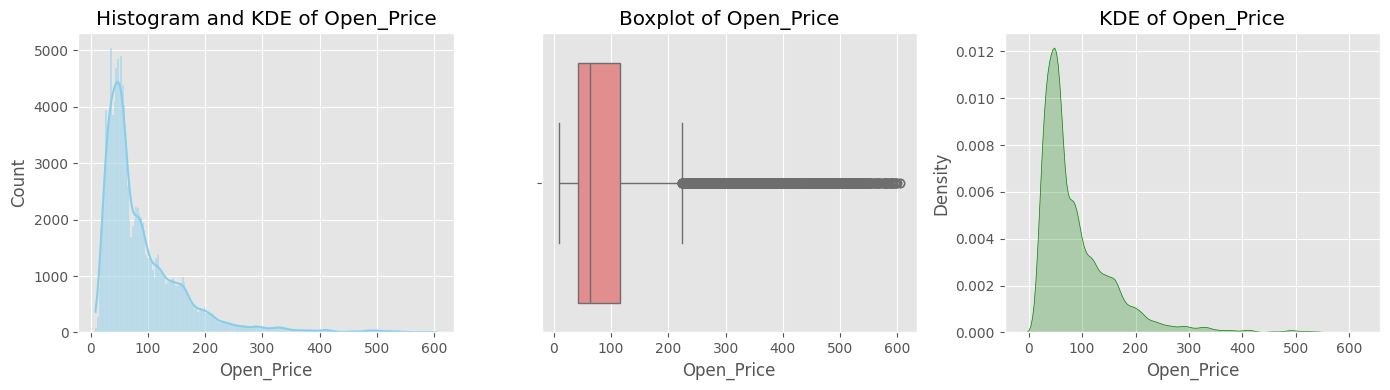

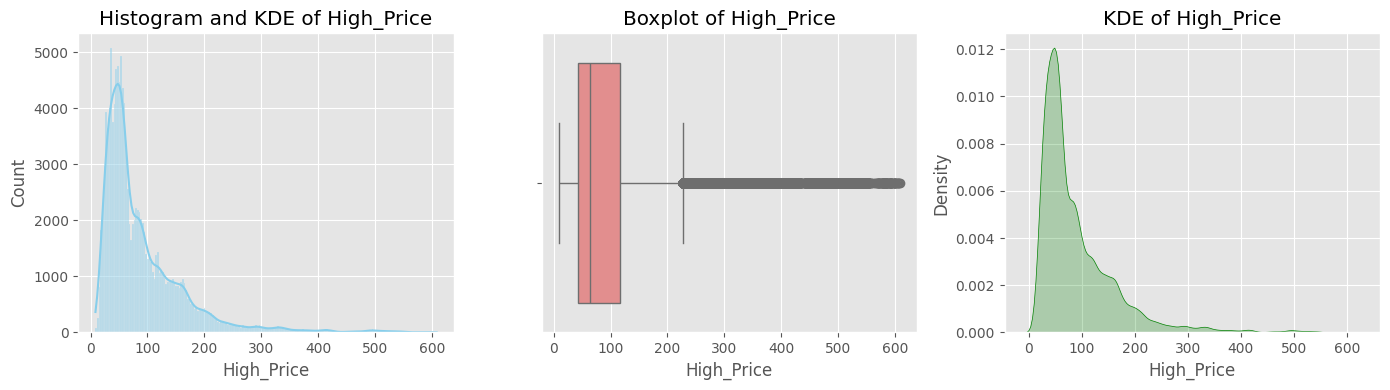

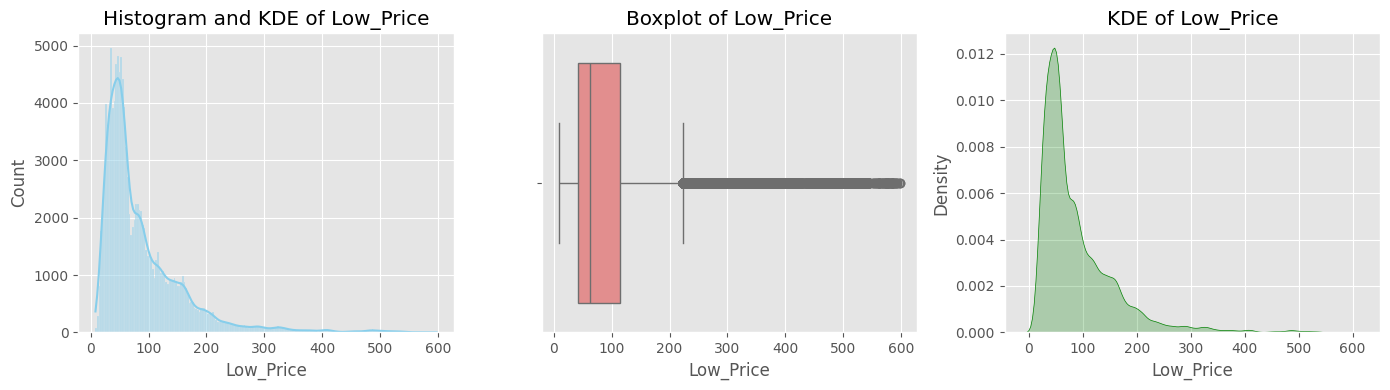

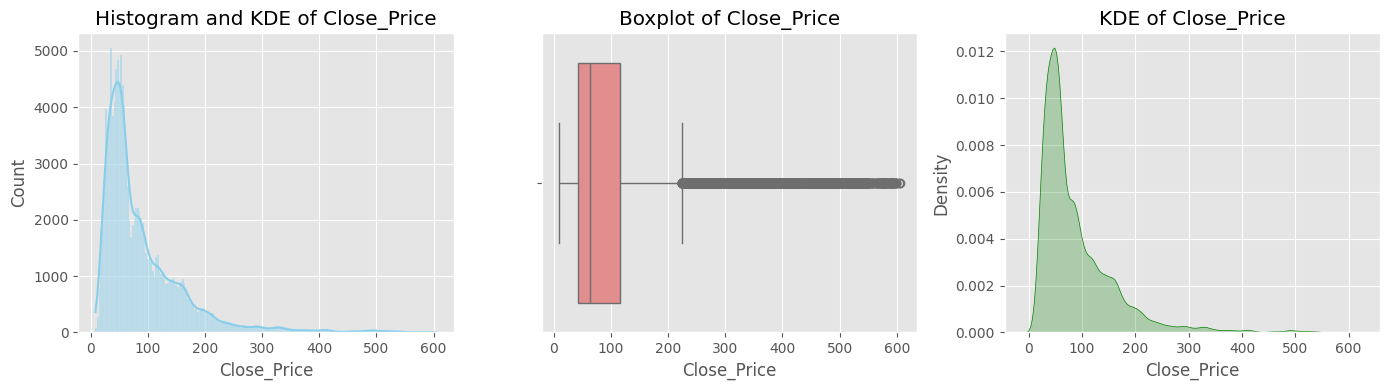

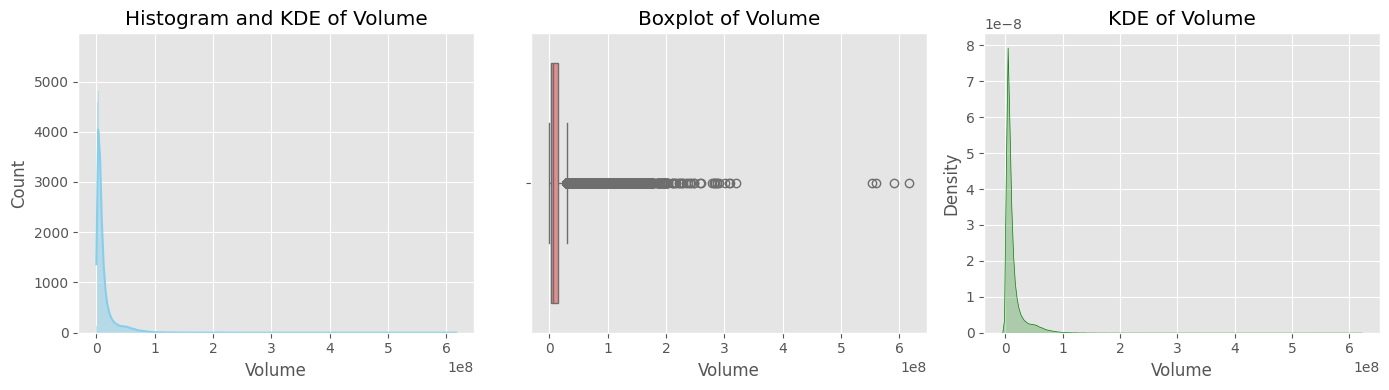

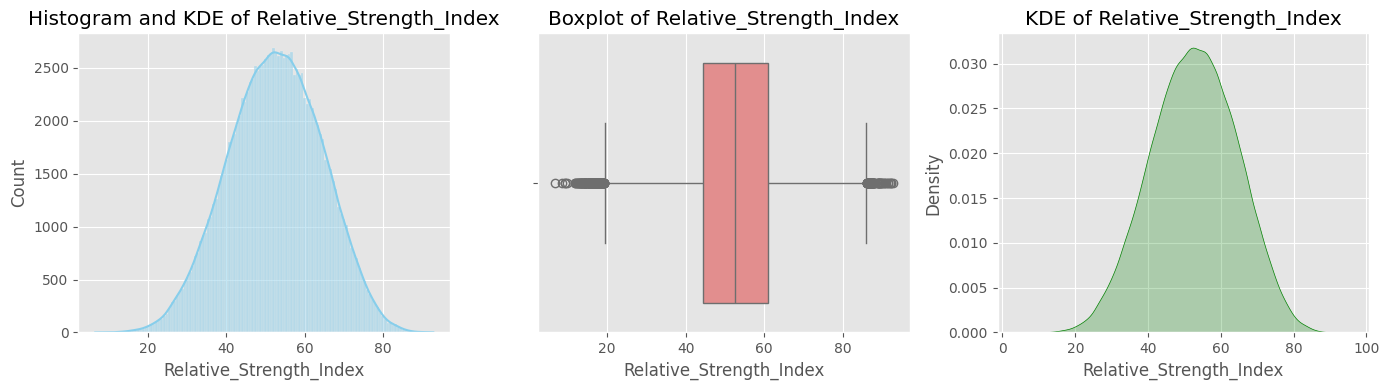

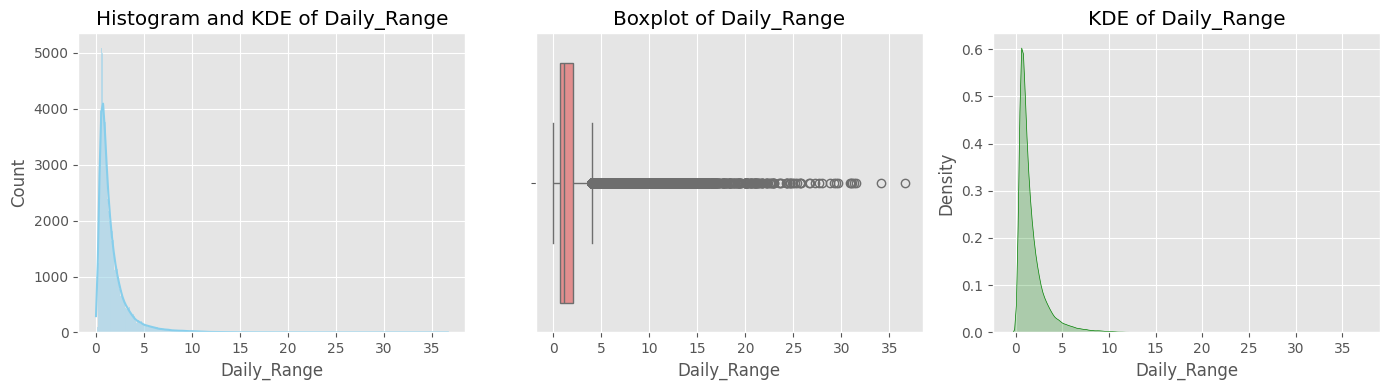

In [ ]:
df['Daily_Range'] = df['High_Price'] - df['Low_Price']
df['Relative_Strength_Index'] = df['Relative_Strength_Index'].interpolate(method='linear')

# List of numerical columns to analyze
numerical_cols = ['Open_Price', 'High_Price', 'Low_Price', 'Close_Price', 'Volume',
                  'Relative_Strength_Index', 'Daily_Range']

# Univariate analysis
for i, col in enumerate(numerical_cols, 1):
    plt.figure(figsize=(14, 4))

    # Histogram and KDE
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram and KDE of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    # Density Plot (KDE separately)
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], color='green', fill=True)
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()

**Observations:**
* Right-skewed distributions in the price columns(open, high, low, close) and volume indicate that the dataset contains a mix of regular values and occasional high values, which could be caused by market events or specific stocks with higher prices or volumes.
* Outliers are prominent in all features, especially volume, suggesting that certain days or events led to unusually high prices or trading activities.

#### Step 4: Outlier Removal using the IQR (Interquartile Range) method

In [ ]:
# Remove outliers based on IQR for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to only include non-outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the dataframe after outlier removal
print(df.shape)
print(df.head())

(94310, 9)
         Date  Open_Price  High_Price  Low_Price  Close_Price    Volume  \
14 1999-11-19       87.69       88.63      86.75        88.13  17660200   
15 1999-11-22       88.19       88.38      86.63        87.50  13612200   
16 1999-11-23       89.25       89.50      87.50        88.50  24051900   
18 1999-11-26       95.25       95.38      92.81        93.19  12171000   
19 1999-11-29       93.88       95.50      92.63        92.75  23370700   

   Equity  Relative_Strength_Index  Daily_Range  
14   CSCO                  80.3422         1.88  
15   CSCO                  78.2302         1.75  
16   CSCO                  79.1664         2.00  
18   CSCO                  82.9216         2.57  
19   CSCO                  81.3456         2.87  


#### Step 5: Feature Relationships
* Scatterplot
* Heatmap Correlation
* Groupby comparisons

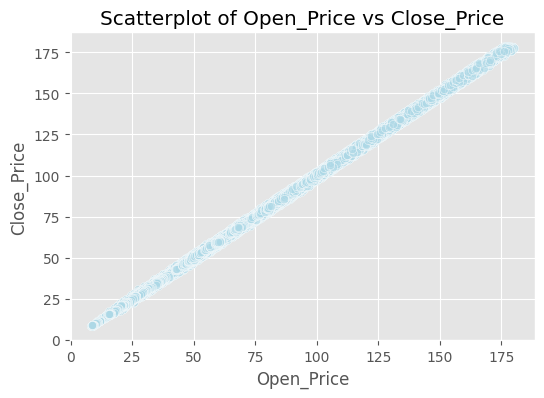

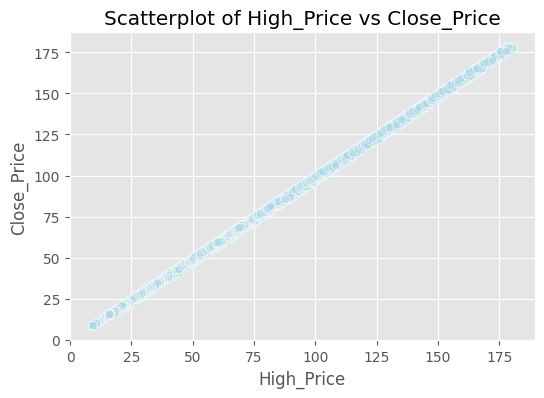

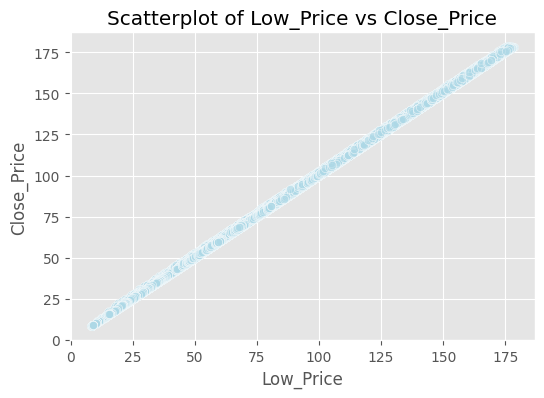

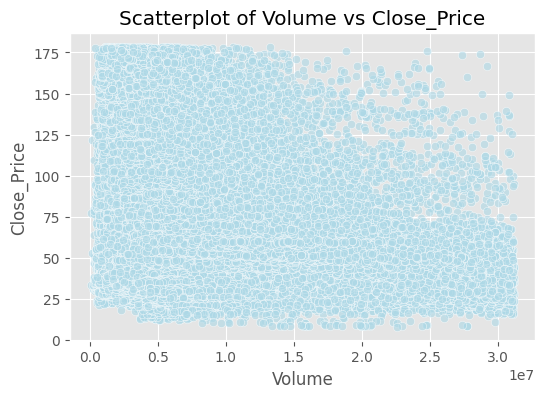

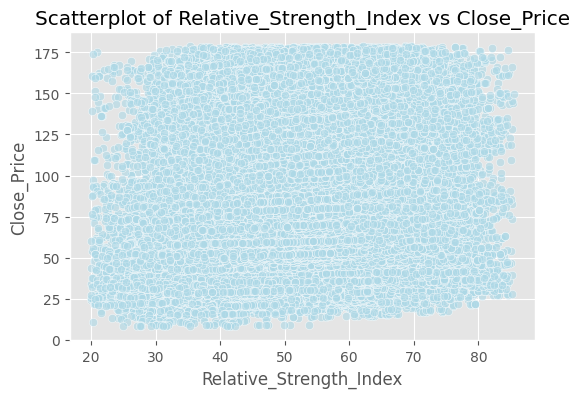

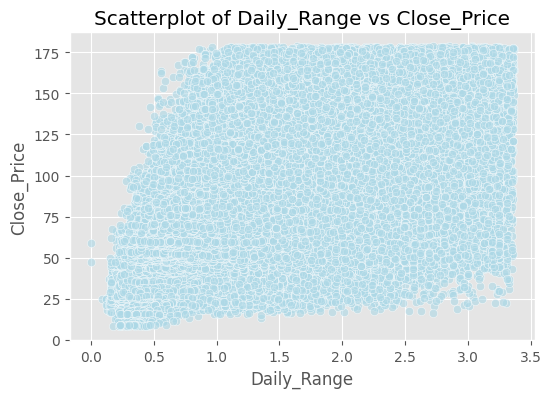

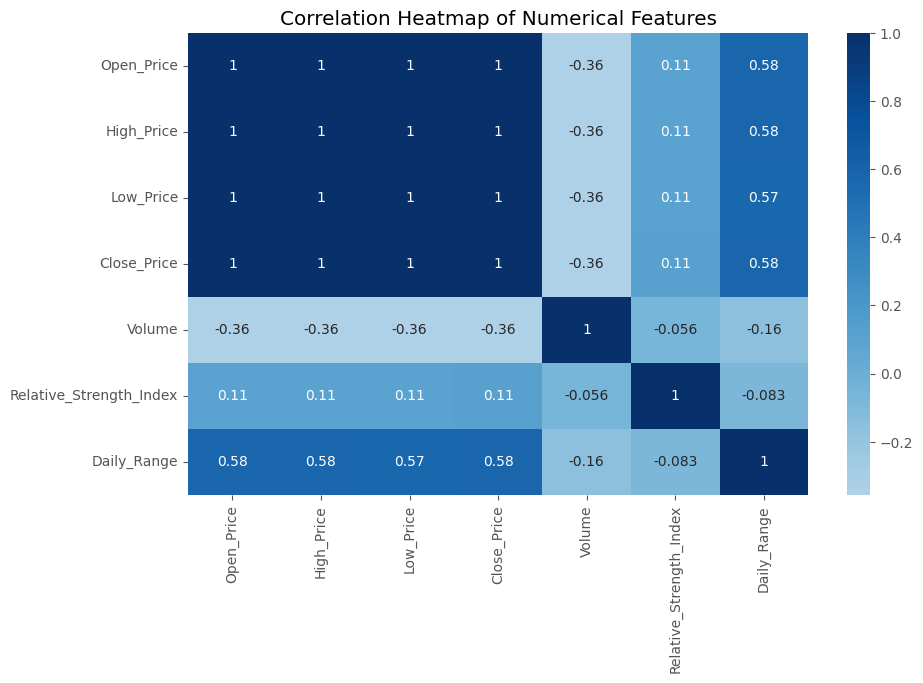

Mean values for each equity:
        Open_Price  High_Price   Low_Price  Close_Price        Volume  \
Equity                                                                  
CSCO     40.903169   41.242024   40.569155    40.919091  2.027177e+07   
CVX      97.128948   97.931455   96.308013    97.145948  7.053030e+06   
GS      119.092284  120.174819  118.037482   119.117148  3.954549e+06   
HD       58.673665   59.222586   58.121900    58.679800  9.674583e+06   
HON      69.568519   70.168766   68.955263    69.583280  3.881762e+06   
IBM     121.643239  122.583616  120.774973   121.702602  5.561120e+06   
INTC     42.175065   42.578758   41.787415    42.200863  2.254482e+07   
JNJ      94.301626   94.928992   93.660703    94.315841  8.346260e+06   
JPM      69.652129   70.259365   69.014157    69.648311  1.332976e+07   
KO       50.575080   50.964349   50.186788    50.593717  1.044079e+07   
MCD      68.862645   69.379253   68.367250    68.881045  5.994329e+06   
MMM     106.707017  10

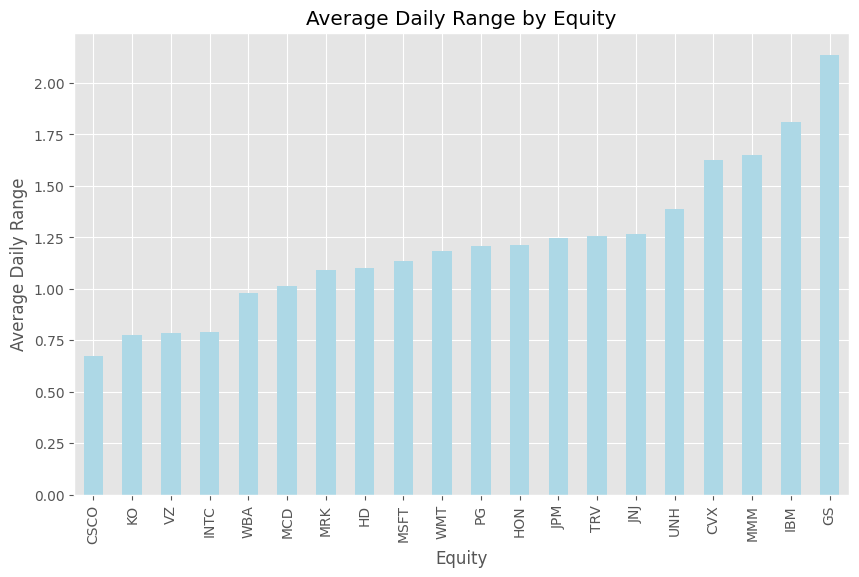

In [ ]:
# List of numerical columns for analysis
numerical_cols = ['Open_Price', 'High_Price', 'Low_Price', 'Close_Price',
                  'Volume', 'Relative_Strength_Index', 'Daily_Range']

# Step 1: Scatterplot for feature relationships
for col in numerical_cols:
    if col != 'Close_Price':  # Example: comparing other features with Close_Price
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=col, y='Close_Price', data=df, color='lightblue', alpha=0.6)
        plt.title(f'Scatterplot of {col} vs Close_Price')
        plt.xlabel(col)
        plt.ylabel('Close_Price')
        plt.show()

# Step 2: Heatmap for correlation between numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Step 3: Groupby comparisons - Example with Equity groups
# Compute the mean of each numerical feature for each equity
grouped_data = df.groupby('Equity')[numerical_cols].mean()
print("Mean values for each equity:")
print(grouped_data)

# Visualize the groupby comparison with a barplot for one feature (e.g., Daily_Range)
plt.figure(figsize=(10, 6))
grouped_data['Daily_Range'].sort_values().plot(kind='bar', color='lightblue')
plt.title('Average Daily Range by Equity')
plt.xlabel('Equity')
plt.ylabel('Average Daily Range')
plt.show()

**Observation:**

1. **Strong Price Correlations**:
   - **Open_Price, High_Price, Low_Price vs. Close_Price**: All three (Open, High, Low) show strong linear relationships with Close_Price, indicating that these price points are highly predictive of the closing price.
   - **Daily_Range vs. Close_Price**: Stocks with larger daily price ranges tend to have higher closing prices, suggesting that more volatile stocks may be priced higher.

2. **Volume vs. Close_Price**:
   - There is no clear relationship between Volume and Close_Price, as shown by a dense scatterplot without a strong trend. Higher or lower trading volumes do not predict price levels.

3. **Relative_Strength_Index (RSI) vs. Close_Price**:
   - RSI shows no strong relationship with Close_Price. The scatterplot shows a neutral distribution (around 50), meaning stocks are not strongly overbought or oversold.

4. **Correlation Heatmap Summary**:
   - **Perfect Correlations (1)**: Open, High, Low, and Close_Price move in lockstep, indicating price consistency and low volatility.
   - **Volume**: Shows a negative correlation (-0.36) with price features, suggesting higher volumes associate with lower prices.
   - **RSI**: Weak positive correlation (~0.11) with prices, indicating it is not a strong predictor of stock price.
   - **Daily_Range**: Moderate positive correlation (~0.58) with prices, supporting the link between higher volatility and higher prices.

5. **Average Daily Range (Bar Chart)**:
   - Stocks like **GS, IBM, and MMM** show higher daily ranges (~2 points), indicating greater intraday volatility.
   - Stocks like **CSCO, KO, and VZ** have lower daily ranges (~0.5 points), reflecting more stability.

6. **Mean Values for Each Equity**:
   - **Price Consistency**: For each stock, mean Open, High, Low, and Close_Price values are very close, aligning with the heatmap findings of strong correlations.
   - **Volume Differences**: Significant volume variations exist across equities, with **INTC** and **MSFT** having much higher volumes than stocks like **TRV**.
   - **Daily Range**: Stocks such as **GS** and **IBM** have higher daily ranges (~2 points), while **CSCO** and **KO** have ranges below 1 point, indicating different volatility levels.
   - **RSI Values**: Most stocks have an RSI around 50–55, indicating neutral momentum, with **MSFT** slightly higher at ~56.6, hinting at stronger buying interest.

#### Step 6: Apply Both LSTM and Transformer models to stock data

###### **Preliminaries**

In [ ]:
pip install numpy pandas scikit-learn tensorflow

In [ ]:
df.columns

Index(['Date', 'Open_Price', 'High_Price', 'Low_Price', 'Close_Price',
       'Volume', 'Equity', 'Relative_Strength_Index', 'Daily_Range'],
      dtype='object')

###### **Data Preparation**

In [ ]:
from sklearn.model_selection import train_test_split

# Define sequence length
sequence_length = 60  # 60 days of historical data for each sequence

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open_Price', 'High_Price', 'Low_Price', 'Volume', 'Relative_Strength_Index', 'Daily_Range', 'Close_Price']])

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - sequence_length:]  # Include sequence length overlap for correct test sequences

# Create sequences for training and testing
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # Features (all columns except Close_Price)
        y.append(data[i + sequence_length, -1])  # Target is Close_Price
    return np.array(X), np.array(y)

# Generate training and testing sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

###### **LSTM Model**

In [ ]:
# Define the LSTM model function (make sure it's separate from the actual model object)
def lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer for predicting Close_Price
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Instantiate the model (make sure it's assigned to a variable)
model = lstm_model((X_train.shape[1], X_train.shape[2]))

# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Now you can use 'model' to make predictions
lstm_test_predictions = model.predict(X_test)

Epoch 1/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - loss: 0.0067 - val_loss: 3.0155e-04
Epoch 2/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - loss: 0.0012 - val_loss: 3.2417e-04
Epoch 3/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - loss: 8.8221e-04 - val_loss: 2.4549e-04
Epoch 4/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - loss: 6.5820e-04 - val_loss: 2.2990e-04
Epoch 5/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - loss: 5.7489e-04 - val_loss: 3.4462e-04
Epoch 6/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - loss: 5.0647e-04 - val_loss: 2.0554e-04
Epoch 7/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - loss: 4.9667e-04 - val_loss: 1.8560e-04
Epoch 8/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - loss: 4.5954e-04 - val_loss: 1.7921e-04
Epoch 9/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - loss: 4.4993e-04 - val_loss: 2.7363e-04
Epoch 10/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - loss: 5.0011e-04 - val_loss: 1.9320e-04
Epoch 11/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 76s 39

###### **Permutation Feature Importance for LSTM**

In [ ]:
# Calculate importance scores by feature
importance_scores = []
def calculate_permutation_importance(model, X_test, y_test, scaler):
  for i in range(X_test.shape[2]):  # Loop over each feature
    # Permute feature i in the test data
    X_test_permuted = np.copy(X_test)
    np.random.shuffle(X_test_permuted[:, :, i])

    # Get predictions with permuted feature and calculate performance
    permuted_predictions = model.predict(X_test_permuted).reshape(-1, 1)

    # Prepare placeholder array for inverse scaling
    permuted_predictions_full = np.zeros((permuted_predictions.shape[0], scaler.n_features_in_))
    permuted_predictions_full[:, -1] = permuted_predictions[:, 0]

    # Inverse transform to get the actual scale
    permuted_predictions_scaled = scaler.inverse_transform(permuted_predictions_full)[:, -1]

    # Calculate MSE after permutation
    permuted_mse = mean_squared_error(y_test_scaled, permuted_predictions_scaled)

    # Append importance score as the difference in MSE
    importance_scores.append(permuted_mse - mse)
  return np.array(importance_scores)

# Use the function to calculate feature importance
feature_importance_scores = calculate_permutation_importance(model, X_test, y_test, scaler)

# Display feature importance scores
for i, score in enumerate(feature_importance_scores):
    print(f"Feature {i + 1} importance: {score}")

590/590 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
Feature 1 importance: 508.3577712732899
Feature 2 importance: 510.9980048120057
Feature 3 importance: 1136.0880574679343
Feature 4 importance: 509.271635338185
Feature 5 importance: 510.031338869432
Feature 6 importance: 510.11772878542337


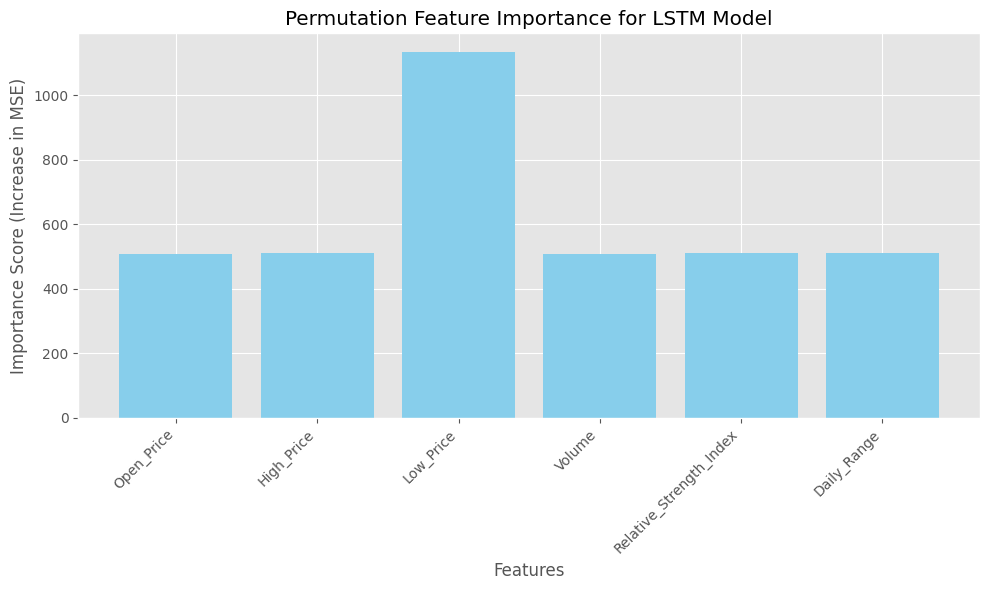

In [ ]:
# Use the given feature names for the plot
feature_names = ['Open_Price', 'High_Price', 'Low_Price', 'Volume', 'Relative_Strength_Index', 'Daily_Range']

# Plotting the feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance_scores, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score (Increase in MSE)')
plt.title('Permutation Feature Importance for LSTM Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observation of Feature Importances:**
* Low_Price Importance: 1136.088: This feature has the highest importance, which suggests that it has the largest effect on the model’s predictions. This feature is likely to be very influential in predicting the target variable (probably Close_Price in this context).

* Feature 1, 2, 4, 5, 6 Importance: These features have similar importance scores ranging between 508 and 510, suggesting that they have relatively equal contributions to the model's performance.

###### **Transformer Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Define an Transformer model
def transformer_model(input_shape, num_heads=2, ff_dim=16):
    inputs = Input(shape=input_shape)

    # Multi-head attention layer with fewer heads
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(inputs, inputs)
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)  # Residual connection

    # Smaller feed-forward layer dimensions
    ffn_output = Dense(ff_dim, activation="relu")(attention_output)
    ffn_output = Dense(input_shape[-1])(ffn_output)
    ffn_output = LayerNormalization(epsilon=1e-6)(ffn_output + attention_output)  # Residual connection

    # Output layer (using only the last time step's output)
    outputs = Dense(1)(ffn_output[:, -1, :])

    # Compile the model with Adam optimizer
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")
    return model

# Instantiate and train the optimized Transformer model
transformer = transformer_model((X_train.shape[1], X_train.shape[2]))

# Train with fewer epochs and smaller batch size
transformer.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - loss: 0.0957 - val_loss: 0.0035
Epoch 2/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 3/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 0.0011 - val_loss: 8.9424e-04
Epoch 5/20
943/943 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 8.9759e-04 - val_loss: 7.8156e-04


###### **Making Predictions on Test Data And Plotting and Evaluating the LSTM Model**

590/590 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
Mean Squared Error (MSE): 2.525189209589668
Mean Absolute Error (MAE): 0.7155451416932244
Root Mean Squared Error (RMSE): 1.5890843934762144


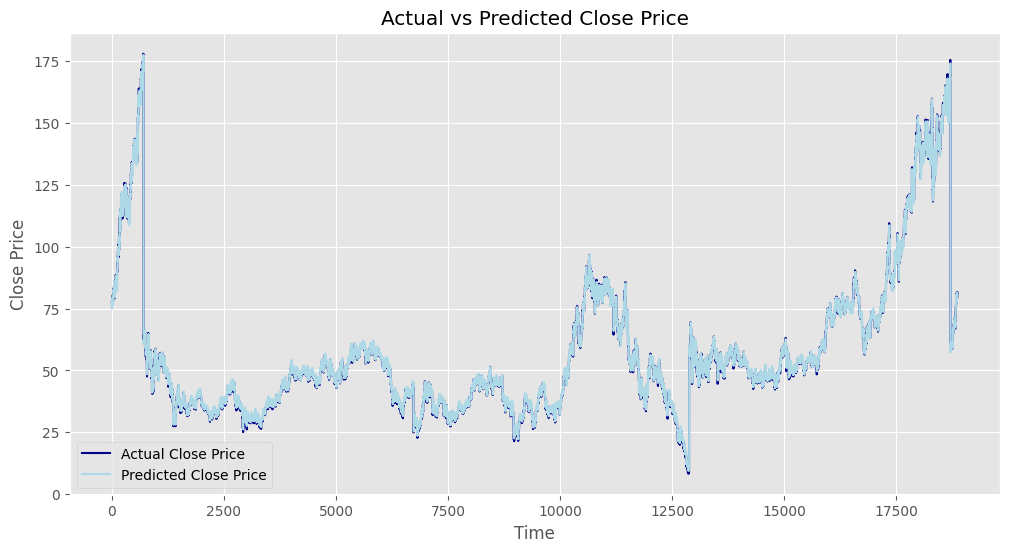

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
lstm_test_predictions = model.predict(X_test)

# Reshape predictions if necessary
lstm_test_predictions = lstm_test_predictions.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)  # Reshape actual values for inverse scaling

# Prepare placeholder arrays to hold the full feature set
# This allows scaler.inverse_transform to work correctly
lstm_test_predictions_full = np.zeros((lstm_test_predictions.shape[0], scaler.n_features_in_))
y_test_full = np.zeros((y_test.shape[0], scaler.n_features_in_))

# Insert the predictions and actual 'Close_Price' into the correct column
lstm_test_predictions_full[:, -1] = lstm_test_predictions[:, 0]  # Assuming Close_Price is the last column
y_test_full[:, -1] = y_test[:, 0]  # Assuming Close_Price is the last column

# Inverse transform to get the original scale of Close_Price only
lstm_test_predictions_scaled = scaler.inverse_transform(lstm_test_predictions_full)[:, -1]
y_test_scaled = scaler.inverse_transform(y_test_full)[:, -1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_scaled, lstm_test_predictions_scaled)
mae = mean_absolute_error(y_test_scaled, lstm_test_predictions_scaled)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label="Actual Close Price", color="darkblue")
plt.plot(lstm_test_predictions_scaled, label="Predicted Close Price", color="lightblue")
plt.title("Actual vs Predicted Close Price")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**Observation**

The image shows a time series plot comparing the actual close price and the predicted close price.

* Mean Squared Error (MSE): 2.525 indicates the average squared difference between the predicted and actual values. A lower value generally implies a better model.

* Mean Absolute Error (MAE): 0.716 represents the average absolute difference between predictions and actual values. The metric shows that the model's predictions are off by about 0.72 units on average, which could be seen as reasonably accurate depending on the data's typical range.

* Root Mean Squared Error (RMSE): 1.589 reflects the standard deviation of the prediction errors. It is a more interpretable version of MSE in terms of the same units as the target variable. The RMSE of 1.59 suggests that the model's error distribution has a moderate spread.

In [ ]:
import numpy as np

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_scaled - lstm_test_predictions_scaled) / y_test_scaled)) * 100

# Calculate accuracy as (100 - MAPE)
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Model Accuracy: {accuracy}%")

Mean Absolute Percentage Error (MAPE): 1.441444738705495%
Model Accuracy: 98.5585552612945%


**Observation**

The low MAPE and high model accuracy suggest that the model is highly effective at predicting the closing prices relative to the actual values. In practical terms, a MAPE of 1.44% is quite good, especially in financial forecasting, where predicting prices with high precision is challenging.